# Auto Example: Optimal Van Dimensions

This notebook shows how the dimensions of a vehicle can be optimised for minimal drag.

Written by Thomas Steffen for teaching purposes.

This is an open educational resource available on github. 

## Setup

This code sets up our Python environment.

In [1]:
# Basic Setup
%pip install -q ipywidgets ipycanvas
import ipywidgets as widgets
import ipycanvas as canvas
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sciopt

p = sym.Symbol("p")

## Cost Function Definition

Assume that the van is a box, with length $x$, width $y$, and height $z$. 

The expected volume is $V=xyz=20m^3$. This is a constraint, but we will use it to eliminate variables.

In [2]:
V = 25
V

25

The aerodynamic drag based on typical speeds and aerodanymics is $F_D=130N$ per $m^2$ of frontal area (this is based a typical drag coefficient and temperature):

$$ J_1 = 130N A_f $$

In [3]:
FD = 130
FD

130

The second part of the cost function is based on the vehicle weight, which is assumed to be proportional to the surface area, leading to rolling friction.To simplify the analysis, we assume that the front is square ($y=z$), which leads to 

$$ y = z $$

and a total surface area of

$ A_S = 2 (xy + yz + xz) = 4 x^2 + 2 xz $$

The friction (weight times rolling friction coefficient) per surface area is assumed to be $F_T = 10N$:

In [4]:
FT = 10
FT

10

### Use $p=y$

We use $y$ as the decision variable $p$

$$ p = y $$

(remember $y=z$), and so $A_f=yz=p^2$ and $z=Vp^{-2}$.

This gives us the first cost function for the aerodynamic drag:

$$ J_1 = F_D*A_f = F_Dp^2 = 130p^2 $$

This can be implemented and validated as:

In [5]:
def J1(p):
    return FD*p**2

J1(p)

130*p**2

The second force is based on 

$$ A_S = 2 (xy + yz + xz) = 4 p^2 + 2 V/p $$

which leads to

$$ J_2(p) = 4 F_T p^2 + 2 F_T V/p $$

In Python, this gives us another function:

In [6]:
def J2(p):
    return 2*FT*p**2+4*FT*V/p

J2(p)

20*p**2 + 1000/p

### Use $p=x$

We use $x$ as the decision variable $p$, and so $A=V/p$, which leads to 

$$ J_1(p) = \frac{F_D*V}{p} = \frac{2600}{p} $$

This can be implemented and validated as:

def J1(p):
    return FD*V/p

J1(p)

OVerall the tyre friction can be estimated as proportional to be:

$$ J_2 = \frac{4 F_T V}{p} + 2 F_T \sqrt{Vp} $$

In Python:

def J2(p):
    return 4*FT*V/p+2*FT*(V*p)**0.5

J2(p)

### Add the cost elements

Together, this gives us

$$ J = J_1 + J_2$$

This function is implemented here:

In [7]:
def J(p):
    return J1(p) + J2(p)

J(p)

150*p**2 + 1000/p

### Use lambda

Note that the def keyword is not very flexible, and it may be preferable to define the function using the anonymous lambda expression, especially if the function has external variables:

In [8]:
func = lambda p : J1(p) + J2(p)

func(p)

150*p**2 + 1000/p

## Plot The Cost Function

Now, we want to plot this function. 

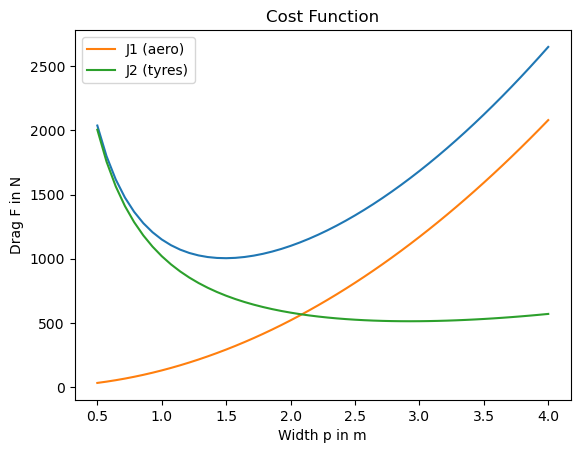

In [9]:
ps = np.linspace(0.5,4)
Js = J(ps)
J1s = J1(ps)
J2s = J2(ps)

plt.plot(ps,Js)
plt.plot(ps,J1s, label="J1 (aero)")
plt.plot(ps,J2s, label="J2 (tyres)")

plt.xlabel("Width p in m")
plt.ylabel("Drag F in N")
plt.title("Cost Function")
plt.legend()
plt.show()

## Optimisation

We can use a minimisation alogrithm to find the exact minimum:

In [10]:
pstar = sciopt.minimize(J,[5])
pstar

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 1004.1494251232543
        x: [ 1.494e+00]
      nit: 6
      jac: [ 0.000e+00]
 hess_inv: [[ 1.110e-03]]
     nfev: 16
     njev: 8

## Create Derivatives

Finally, we can find the derivates of the cost function for further analysis.

This is the cost function in symbolic form ($p$ was defined as a symbol):

In [11]:
p=sym.Symbol("p")
Jp=J(p)
Jp

150*p**2 + 1000/p

The function diff can find the first derivative:

In [12]:
Jp1=sym.diff(Jp,p)
Jp1

300*p - 1000/p**2

Applying it again finds the second derivative:

In [13]:
Jp2=sym.diff(Jp1,p)
Jp2

300 + 2000/p**3

Finally, we can solve the Kuhn-Tucker condition $J'(p)=0$ without any iteration to find a candidate solution:

In [14]:
sym.solve(Jp1,p)

[10**(1/3)*3**(2/3)/3,
 -10**(1/3)*3**(2/3)/6 - 10**(1/3)*3**(1/6)*I/2,
 -10**(1/3)*3**(2/3)/6 + 10**(1/3)*3**(1/6)*I/2]

Unsurprisingly, the equation has 3 solutions (being a third order equation). Luckily two of these are clearly not of interesting, leaving one solution:

$$ p^* = \sqrt[3]{10/3} \approx 1.494 $$